Consider the student performance dataset. Predict the student performance as “Pass” or “Fail” by implementing a decision tree. Perform data preprocessing and visualize the data.Identify the important feature affecting the student performance and analyze the efficiency of the decision tree using different metrics.Plot the decision tree. 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,
f1_score
import matplotlib.pyplot as plt
from sklearn import tree


In [2]:
df=pd.read_csv('student_performance_new.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 53
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sl.No.              53 non-null     int64  
 1   USN                 53 non-null     object 
 2   STUDENT NAME        53 non-null     object 
 3   Test I              53 non-null     int64  
 4   Test II             53 non-null     int64  
 5   Test III            53 non-null     int64  
 6   Test Total          53 non-null     float64
 7   Test Result         53 non-null     int64  
 8   Quiz 1              53 non-null     float64
 9   Quiz 2              53 non-null     float64
 10  Compensatory        53 non-null     float64
 11  Quiz                53 non-null     float64
 12  Quiz Result         53 non-null     int64  
 13  Test + Quiz         53 non-null     float64
 14  Assignment          53 non-null     int64  
 15  Unnamed: 15         53 non-null     int64  
 16  Assignment Resu

In [3]:
df = df.dropna()  
# Drop rows with missing values or use imputation techniques

input=df.drop(['Result','Sl.No.','Test I ','Test II ','Test III','Quiz 1','Quiz 2',
               'Compensatory','Test Result ','Quiz Result ','Assignment Result ','Test + Quiz'],axis='columns')
# print(input)
input = input.select_dtypes(include="number")
#Drop target column to form input dataset and remove categorical dataset from it

target=df['Result']
#create a dataset containing only target column

In [43]:
input.head(10)

,Test Total,Quiz,Assignment,Unnamed: 15
0,29.000000,16.0,14,13
1,30.000000,15.5,14,13
3,25.333333,13.0,13,13
4,31.333333,16.0,13,14
5,27.333333,16.5,14,14
6,35.000000,15.0,15,15
7,17.000000,16.0,13,14
8,24.333333,13.0,14,14
9,23.333333,15.0,14,14
10,20.666667,17.0,14,14


In [6]:
#split data into train dataset and test dataset
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=42)


In [7]:
#Train a model based on training data
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [8]:
#test model accuracy using test data
model.score(X_test,y_test)

0.9090909090909091

In [15]:
# # Make predictions on the custom input dataset
# model.predict([['23','18','12','15']])

/home/nithin/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [16]:
# Make predictions on the test input dataset
y_pred = model.predict(X_test)

# Calculate evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-score: {f1_score(y_test, y_pred)}")


Accuracy: 0.9090909090909091
Precision: 0.8
Recall: 1.0
F1-score: 0.888888888888889


In [12]:
# Get feature importances from the decision tree model
feature_importances = model.feature_importances_
for i,j in zip(input.columns,feature_importances):
    print(i,"=",j)

#below code is alternative for above command

# Create a DataFrame to store feature importances and corresponding feature names
#feature_importance_df = pd.DataFrame({"Feature": input.columns, "Importance": feature_importances})

# Sort features by importance (descending order)
#feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Print the important features
#print("Important Features:")
#print(feature_importance_df)


Test Total  = 0.856749317236272
Quiz = 0.053127635299370056
Assignment  = 0.0
Unnamed: 15 = 0.0901230474643579


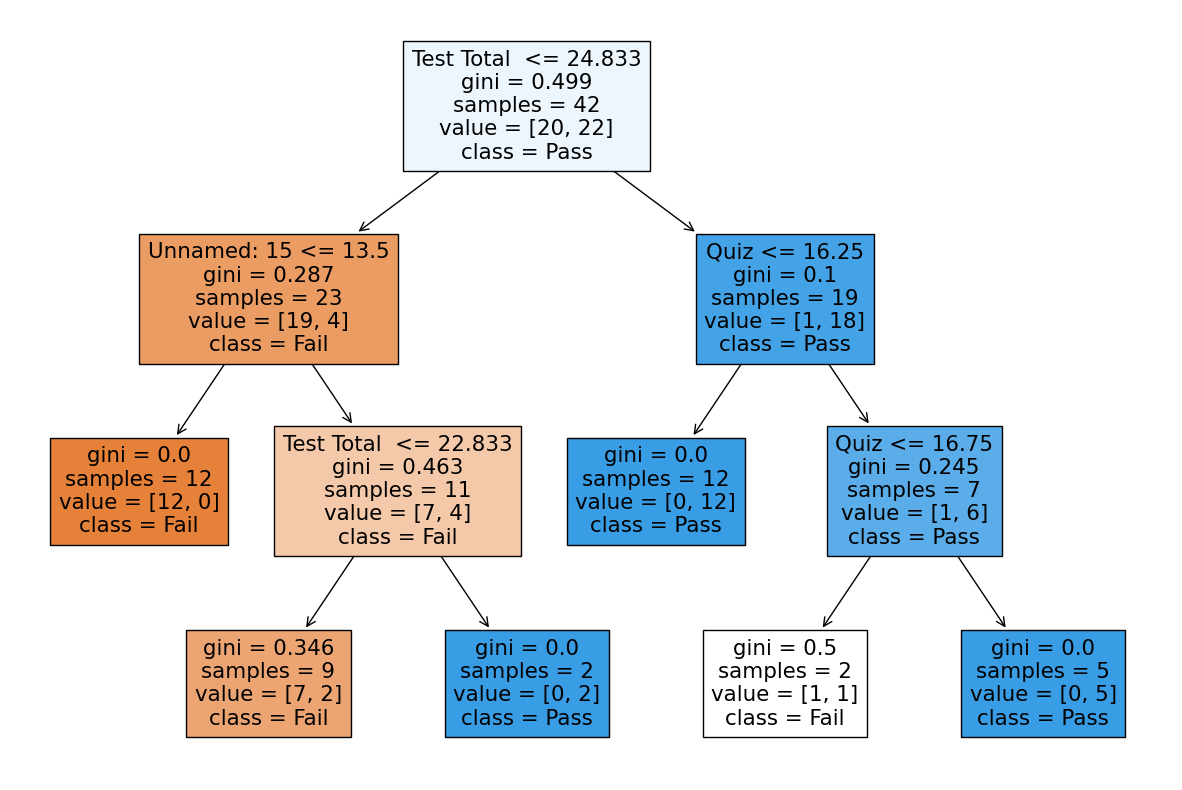

In [17]:
# Convert X.columns to a list and plot the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(model, feature_names=list(input.columns), class_names=["Fail", "Pass"], filled=True)
plt.show()


Index(['Test Total ', 'Quiz', 'Test + Quiz', 'Assignment 1', 'Assignment 2'], dtype='object')